In [126]:
#!pip install --upgrade pip
#!pip install yfinance
#!pip install scikit-learn

In [50]:
import yfinance as yf
label = 'AAL'
ticker = {}
ticker[ label ] = yf.Ticker( label )
tk = ticker[ label ]
# print(tk.info)
for key, value in tk.info.items():
    print(f'{key}\t: {value}')


address1	: 1 Skyview Drive
city	: Fort Worth
state	: TX
zip	: 76155
country	: United States
phone	: 682 278 9000
website	: https://www.aa.com
industry	: Airlines
industryKey	: airlines
industryDisp	: Airlines
sector	: Industrials
sectorKey	: industrials
sectorDisp	: Industrials
longBusinessSummary	: American Airlines Group Inc., through its subsidiaries, operates as a network air carrier. The company provides scheduled air transportation services for passengers and cargo through its hubs in Charlotte, Chicago, Dallas/Fort Worth, Los Angeles, Miami, New York, Philadelphia, Phoenix, and Washington, D.C., as well as through partner gateways in London, Doha, Madrid, Seattle/Tacoma, Sydney, and Tokyo. As of December 31, 2022, it operated a mainline fleet of 925 aircraft. The company was formerly known as AMR Corporation and changed its name to American Airlines Group Inc. in December 2013. American Airlines Group Inc. was founded in 1926 and is headquartered in Fort Worth, Texas.
fullTimeEm

In [51]:
print(tk.history(period='max'))

                                Open       High        Low      Close  \
Date                                                                    
2005-09-27 00:00:00-04:00  19.844710  20.174670  18.006365  18.194912   
2005-09-28 00:00:00-04:00  18.194910  19.354483  18.100637  19.326200   
2005-09-29 00:00:00-04:00  19.231926  19.401620  18.949105  19.052805   
2005-09-30 00:00:00-04:00  19.099938  19.844702  19.024518  19.806993   
2005-10-03 00:00:00-04:00  19.703297  20.504627  19.703297  20.268942   
...                              ...        ...        ...        ...   
2024-01-26 00:00:00-05:00  15.550000  15.840000  15.000000  15.130000   
2024-01-29 00:00:00-05:00  15.370000  15.390000  14.860000  14.940000   
2024-01-30 00:00:00-05:00  14.790000  14.880000  14.530000  14.530000   
2024-01-31 00:00:00-05:00  14.490000  14.610000  14.210000  14.230000   
2024-02-01 00:00:00-05:00  14.350000  14.400000  13.870000  14.340000   

                             Volume  Dividends  St

In [52]:
import pandas as pd
import datetime
date_start = datetime.datetime(2020, 1, 1)
date_end  = datetime.datetime(2023, 12, 31)
df = tk.history(start=date_start, end=date_end)

In [53]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,28.873297,29.192119,28.544513,28.982893,6451100,0.0,0.0
2020-01-03 00:00:00-05:00,28.165913,28.185840,27.239337,27.548195,14008900,0.0,0.0
2020-01-06 00:00:00-05:00,27.089889,27.388784,26.980294,27.219410,6105800,0.0,0.0
2020-01-07 00:00:00-05:00,27.458526,27.578085,26.960367,27.119778,6105900,0.0,0.0
2020-01-08 00:00:00-05:00,27.000220,27.986575,26.970330,27.737495,10496800,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,14.380000,14.400000,14.210000,14.310000,25169900,0.0,0.0
2023-12-26 00:00:00-05:00,14.250000,14.260000,14.040000,14.110000,22157900,0.0,0.0
2023-12-27 00:00:00-05:00,14.100000,14.180000,13.910000,13.990000,23428500,0.0,0.0


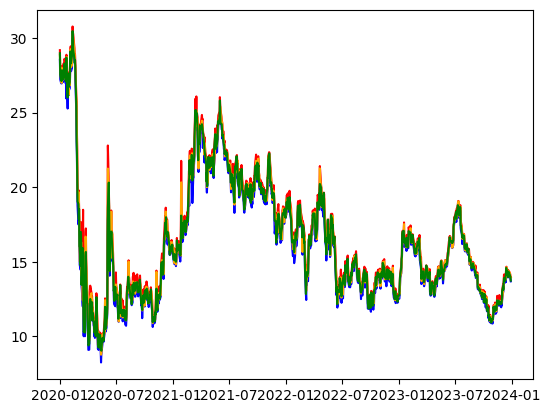

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
# print(df.keys())
# x = df['Date']
y = df['Close']
# print(y)
ax.plot(df['High'], color='red')
ax.plot(df['Low'], color='blue')
ax.plot(df['Open'], color='orange')
ax.plot(df['Close'], color='green')
# plt.show()

In [55]:
import numpy as np
def df_to_xy(df, label):
    x = df.index
    y = df[ label ].to_numpy()
    return x,y

x, y = df_to_xy(df, 'Open')
print(y)

[28.87329739 28.16591294 27.08988943 ... 14.10000038 13.92000008
 13.94999981]


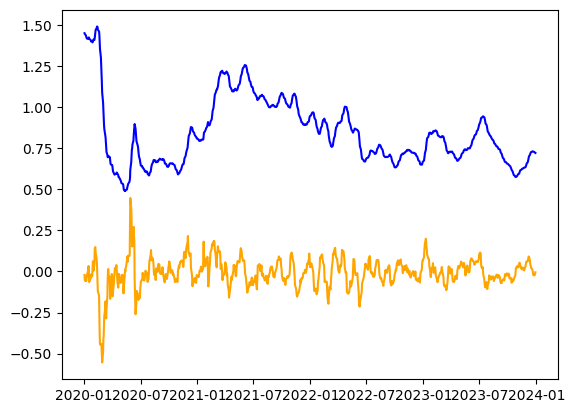

In [56]:
# convolutional
def scalar2array(value, number):
    return value * np.ones(shape=(number,))

def get_kernel(size, mode='gauss', sigma=1):
    if ( size % 2 == 0 ):
        raise ValueError()
    center = (size - 1) / 2
    if ( mode == 'gauss' ):
        sigma2 = 2 * sigma ** 2
        kernel = np.fromfunction(lambda x: np.exp(-(x-center)**2 / sigma2), (size,))
        kernel = kernel / np.sum(kernel)
        return kernel
    elif ( mode == 'mean' ):
        kernel = scalar2array(1/size, size)
        return kernel
    
    raise ValueError()
    

def padding(x, m):
    pad = int(( m - 1 ) / 2)
    # pad_x_head = np.insert(x, 0, scalar2array(x[0], pad))
    # padded_x = np.append(pad_x_head, scalar2array(x[0], pad))
    padded_x = np.append( np.insert(x, 0, scalar2array(x[0], pad)) , scalar2array(x[-1], pad))
    return padded_x

def conv1d(x, k):
    # x : ndarray
    # k : filter array shape(m, 1)
    n = x.shape[0]
    m = k.shape[0]
    padded_x = padding(x, m)
    conv_x = np.zeros_like(x)
    for i in range(n):
        conv_x[i] = np.dot(padded_x[i:i+m], k)
        
    return conv_x

def derivative(x):
    n = x.shape[0]
    pad_x = padding(x, 3)
    grad_x_edge = np.diff(pad_x)
    grad_x = np.zeros_like(x)
    for i in range(n):
        grad_x[i] = (grad_x_edge[i] + grad_x_edge[i+1])/2
    return grad_x

x, y = df_to_xy(df, 'Open')
filter_size = 11
# kernel = scalar2array(1/filter_size, filter_size)
kernel = get_kernel(filter_size, 'mean')
conv_y = conv1d(y, kernel)
dy = derivative(y)
conv_dy = derivative(conv_y)
conv_conv_dy = conv1d(conv_dy, kernel)
ddy = conv1d(derivative(conv_dy), kernel)
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(x, y, color='red')
ax.plot(x, conv_y/(np.max(conv_y) - np.min(conv_y)), color='blue')
# ax.plot(x, dy, color='green')
ax.plot(x, conv_dy/(np.max(conv_dy) - np.min(conv_dy)), color='orange')
# ax.plot(x, conv_conv_dy, color='purple')
# ax.plot(x, ddy, color='green')

0.07901610760581967
15.511778063368993
0.28109803913549386


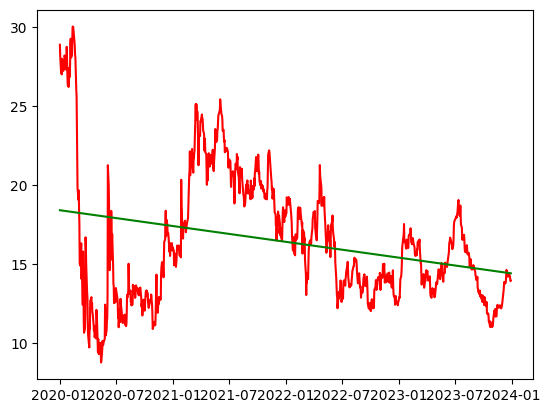

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

def timestamp2unix(date):
    unix = (date.astype(int) / 10**9).to_numpy()
    return unix
    

unix_x = timestamp2unix(x)
ssx = StandardScaler()
ssy = StandardScaler()
std_x = ssx.fit_transform(unix_x.reshape(-1, 1))
std_y = ssy.fit_transform(y.reshape(-1, 1))
model = LinearRegression()
model.fit(std_x, std_y)
pred_std_y = model.predict(std_x)
pred_y = ssy.inverse_transform(pred_std_y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color='red')
ax.plot(x, pred_y, color='green')

print(r2_score(y, pred_y))
print(mean_squared_error(y, pred_y))
print(np.corrcoef(y.flatten(), pred_y.flatten())[0, 1])


In [58]:
from scipy import integrate
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
def fourier_encode(n, x, y, T):
    b = np.zeros(n)# range
    for k in range(n):
        y_star = y * np.sin((k+1) * np.pi * x / T)
        b[k] = 2/T * integrate.trapz(y=y_star, x=x, axis=-1)
    return b

def fourier_decode(b, x, T):
    n = b.shape[0]
    y = np.zeros_like(x)
    for k in range(n):
        y += b[k] * np.sin((k+1)*np.pi*x/T)
    return y

def fourier_decode_dy(b, x, T):
    n = b.shape[0]
    dy = np.zeros_like(x)
    for k in range(n):
        dy += b[k] * (((k+1)*np.pi)/T) * np.cos((k+1)*np.pi*x/T)
    return dy

def fourier_decode_ddy(b, x, T):
    n = b.shape[0]
    dy = np.zeros_like(x)
    for k in range(n):
        dy += b[k] * (((k+1)*np.pi)/T)**2 * (-np.sin((k+1)*np.pi*x/T))
    return dy

def fourier_decode_dddy(b, x, T):
    n = b.shape[0]
    dy = np.zeros_like(x)
    for k in range(n):
        dy += b[k] * (((k+1)*np.pi)/T)**3 * (-np.cos((k+1)*np.pi*x/T))
    return dy


def extend_x(x):
    x0 = x[0]
    dx = x[1] - x[0]
    xN = x[-1]
    reverse_x = x[::-1]
    x_ext = np.concatenate(((x - x0), -reverse_x + 2*xN + dx, (x - x0) + 2*xN + 2*dx, -reverse_x + 4*xN + 3*dx))
    return x_ext

def extend_y(y):
    y0 = y[0]
    reverse_y = y[::-1]
    y_ext = np.concatenate((y - y0, reverse_y - y0, -(y - y0), -(reverse_y - y0)))
    return y_ext + y0
    

[[ 1.00000000e+00  0.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  4.31239934e-03  9.99990702e-01 ...  2.09739203e-01
   9.77757366e-01  2.13953733e-01]
 [ 1.00000000e+00  1.72487954e-02  9.99851228e-01 ...  7.48125668e-01
   6.63557070e-01  7.59459928e-01]
 ...
 [ 1.00000000e+00 -8.62471847e-03  9.99962806e-01 ... -4.10148101e-01
   9.12018933e-01 -4.17998753e-01]
 [ 1.00000000e+00 -4.31239934e-03  9.99990702e-01 ... -2.09739203e-01
   9.77757366e-01 -2.13953733e-01]
 [ 1.00000000e+00 -2.44929360e-16  1.00000000e+00 ... -3.33178207e-14
   1.00000000e+00  1.96438672e-15]]
0.19131730057884444


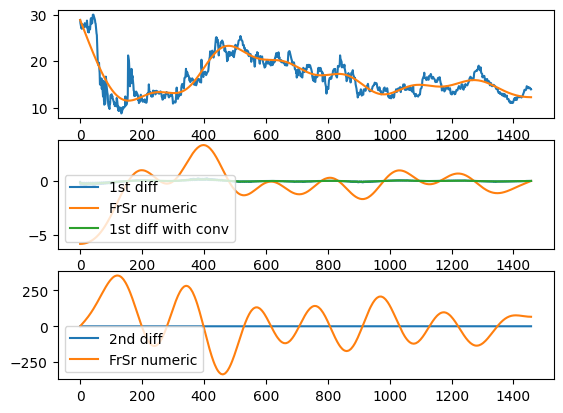

In [59]:
unix_x = timestamp2unix(x)
day_x = (unix_x - np.min(unix_x))/86400
# normalized_x = day_x / np.max(day_x) / 4
x_ext = extend_x(day_x)
x_ext_normalized = (x_ext - x_ext[0]) / np.max(x_ext)
T = 1
y_ext = extend_y(y)
y_ext_normalized = (y_ext - y_ext[0]) / np.var(y_ext)

n = int(np.max(x_ext) / 100)
b = fourier_encode(n, x_ext_normalized, y_ext_normalized, T)
y_decode = fourier_decode(b, x_ext_normalized, T)

y_decode_rescale = y_decode * np.var(y_ext) + y_ext[0]

original_n = unix_x.shape[0]
fig = plt.figure()
ax = fig.add_subplot(311)
ax.plot(day_x, y_ext[:original_n])
ax.plot(day_x, y_decode_rescale[:original_n])

dy_from_y_decode_rescale = derivative(y_decode_rescale)
dy_decode = fourier_decode_dy(b, x_ext_normalized, T)
ax = fig.add_subplot(312)
ax.plot(day_x, dy_from_y_decode_rescale[:original_n], label='1st diff')
ax.plot(day_x, dy_decode[:original_n], label='FrSr numeric')

k_max = 50
x_normalized = day_x / np.max(day_x)
x__ = np.zeros((original_n, 2*k_max))
for k in range(k_max):
    x__[:, 2*k] = np.cos((k)*2*np.pi * x_normalized)
    x__[:, 2*k+1] = np.sin((k+1)*2*np.pi * x_normalized)

print(x__)
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x__, dy_from_y_decode_rescale[:original_n])
dy_lasso = lasso_model.predict(x__)

reg_rbf = SVR(kernel='rbf', C=1, epsilon=0.1, gamma='auto')
reg_rbf.fit(x_normalized.reshape(-1, 1), dy_from_y_decode_rescale[:original_n])
print(reg_rbf.score(x_normalized.reshape(-1, 1), dy_from_y_decode_rescale[:original_n]))
dy_rbf = reg_rbf.predict(x_normalized.reshape(-1, 1))

conv_dy_from_y_decode_rescale = conv1d(dy_from_y_decode_rescale[:original_n], kernel)
# ax.plot(day_x, dy_lasso)
# ax.plot(day_x, dy_rbf)
ax.plot(day_x, conv_dy_from_y_decode_rescale, label='1st diff with conv')
ax.legend()

ddy_from_y_decode_rescale = derivative(dy_from_y_decode_rescale)
ddy_decode = fourier_decode_ddy(b, x_ext_normalized, T)
ax = fig.add_subplot(313)
ax.plot(day_x, ddy_from_y_decode_rescale[:original_n], label='2nd diff')
ax.plot(day_x, ddy_decode[:original_n], label='FrSr numeric')
ax.legend()

In [63]:
kakaku = y_decode_rescale[original_n]
nobi = dy_decode[original_n]
phase = ddy_decode[original_n]
print(kakaku, nobi, phase)

12.260917088700047 0.005953817220859602 66.13388987098858


In [74]:
cumsum = y_decode_rescale[original_n] - y_decode_rescale[original_n-1]
flag = 0
i = 0
if ( cumsum > 0 ): # 増加
    while( flag == 0 ):
        i += 1
        k=original_n-i-1
        direction = y_decode_rescale[k] - y_decode_rescale[k-1]
        if ( direction > 0 ):
            cumsum += direction
        else:
            flag = 1
else:
    while( flag == 0 ):
        i += 1
        k=original_n-i-1
        direction = y_decode_rescale[k] - y_decode_rescale[k-1]
        if ( direction < 0 ):
            cumsum += direction
        else:
            flag = 1
print(cumsum, i)
maximum_k = np.argmax(np.abs(b)) + 1
print(original_n / maximum_k)


8.358297094446243e-06 1
503.0
